In [5]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [113]:
sales = pd.read_csv('sales.csv')

In [7]:
sales.head()

,month,sales
0,2008-01,7615449
1,2008-02,8568396
2,2008-03,8819950
3,2008-04,9747502
4,2008-05,8009360


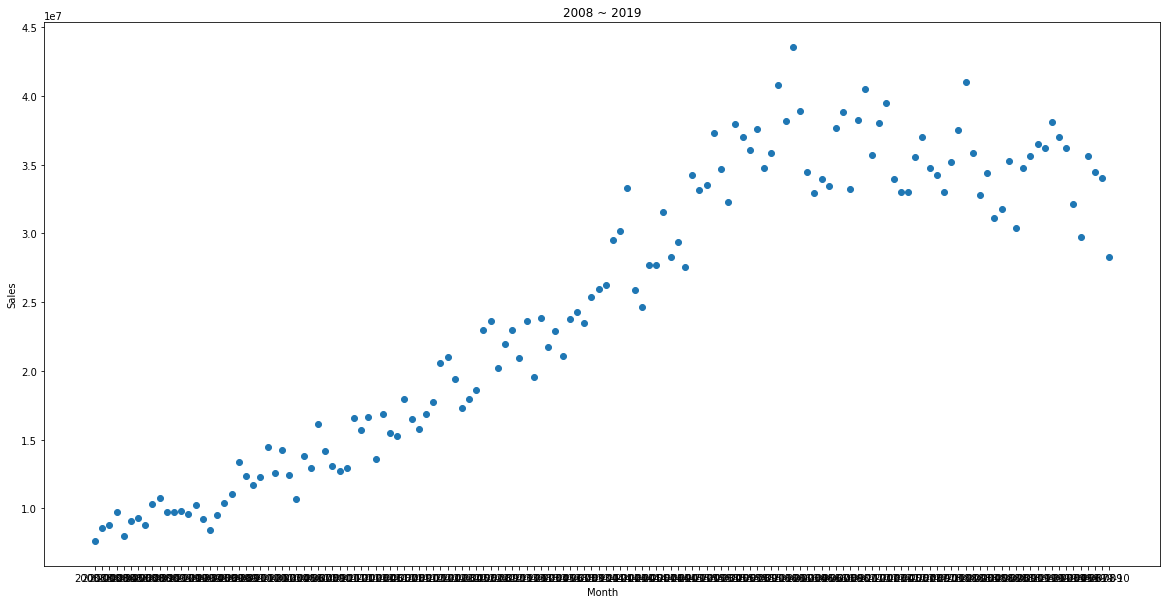

In [57]:
plt.figure(figsize=(20, 10))
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title("2008 ~ 2019")
plt.scatter(sales['month'], sales['sales'])
plt.show()

In [9]:
def yearmonth_to_num(year_month):
    start_year = 2008
    year, month = year_month.split('-')
    index = (int(year) - start_year) * 12 + (int(month) - 1)
    return index
    

In [10]:
yearmonth_to_num("2019-02")

133

In [11]:
yearmonth_index = [yearmonth_to_num(m) for m in sales['month']]

In [12]:
sales['yearmonth_index'] = yearmonth_index

In [13]:
sales.head()

,month,sales,yearmonth_index
0,2008-01,7615449,0
1,2008-02,8568396,1
2,2008-03,8819950,2
3,2008-04,9747502,3
4,2008-05,8009360,4


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
sales.values

array([['2008-01', 7615449, 0],
       ['2008-02', 8568396, 1],
       ['2008-03', 8819950, 2],
       ['2008-04', 9747502, 3],
       ['2008-05', 8009360, 4],
       ['2008-06', 9093838, 5],
       ['2008-07', 9303574, 6],
       ['2008-08', 8782821, 7],
       ['2008-09', 10311969, 8],
       ['2008-10', 10746532, 9],
       ['2008-11', 9737798, 10],
       ['2008-12', 9767261, 11],
       ['2009-01', 9827360, 12],
       ['2009-02', 9607434, 13],
       ['2009-03', 10238630, 14],
       ['2009-04', 9250043, 15],
       ['2009-05', 8405501, 16],
       ['2009-06', 9544035, 17],
       ['2009-07', 10376712, 18],
       ['2009-08', 11046516, 19],
       ['2009-09', 13334613, 20],
       ['2009-10', 12316032, 21],
       ['2009-11', 11669189, 22],
       ['2009-12', 12309787, 23],
       ['2010-01', 14467523, 24],
       ['2010-02', 12586453, 25],
       ['2010-03', 14253354, 26],
       ['2010-04', 12393216, 27],
       ['2010-05', 10672136, 28],
       ['2010-06', 13825379, 29],
     

In [32]:
X_train, X_test, y_train, y_test = train_test_split(sales['yearmonth_index'].values.reshape(-1,1), sales['sales'].values.reshape(-1,1), test_size=0.1)

In [33]:
X_train.shape

(127, 1)

In [34]:
y_train.shape

(127, 1)

In [35]:
X_test.shape

(15, 1)

In [36]:
y_test

array([[14467523],
       [ 7615449],
       [20924017],
       [32115609],
       [26269673],
       [13825379],
       [11046516],
       [34443592],
       [38943263],
       [15801866],
       [17944713],
       [17765450],
       [32292007],
       [40988743],
       [39467452]])

In [37]:
reg = LinearRegression().fit(X_train,  y_train)

In [38]:
reg.score(X_train,y_train)

0.8548923145323484

In [39]:
reg.coef_

array([[233835.01539795]])

In [40]:
reg.intercept_

array([8331386.96234857])

In [41]:
print(y_test)

[[14467523]
 [ 7615449]
 [20924017]
 [32115609]
 [26269673]
 [13825379]
 [11046516]
 [34443592]
 [38943263]
 [15801866]
 [17944713]
 [17765450]
 [32292007]
 [40988743]
 [39467452]]


In [42]:
predicts = reg.predict(X_test)

In [43]:
overall_diff_perc = 0

In [44]:
for y, y_hat in zip(y_test, predicts):
    overall_diff_perc += abs(y-y_hat)/y
    print("Sales: {}, Predicted Sales: {}, Diff: {}, Diff Percent: {}".format(y, y_hat, abs(y-y_hat), abs(y-y_hat)/y))
print("average diff percent: ", overall_diff_perc/len(y_test))

Sales: [14467523], Predicted Sales: [13943427.3318994], Diff: [524095.6681006], Diff Percent: [0.03622567]
Sales: [7615449], Predicted Sales: [8331386.96234857], Diff: [715937.96234857], Diff Percent: [0.09401126]
Sales: [20924017], Predicted Sales: [22127652.87082767], Diff: [1203635.87082767], Diff Percent: [0.05752413]
Sales: [32115609], Predicted Sales: [40132949.05646989], Diff: [8017340.05646989], Diff Percent: [0.24963998]
Sales: [26269673], Predicted Sales: [24933673.05560309], Diff: [1335999.94439691], Diff Percent: [0.05085712]
Sales: [13825379], Predicted Sales: [15112602.40888915], Diff: [1287223.40888915], Diff Percent: [0.09310583]
Sales: [11046516], Predicted Sales: [12774252.25490964], Diff: [1727736.25490964], Diff Percent: [0.15640554]
Sales: [34443592], Predicted Sales: [31481053.48674571], Diff: [2962538.51325429], Diff Percent: [0.08601131]
Sales: [38943263], Predicted Sales: [31247218.47134776], Diff: [7696044.52865224], Diff Percent: [0.19762197]
Sales: [15801866

In [45]:
reg.predict(np.array([142]).reshape(-1,1))

array([[41535959.14885759]])

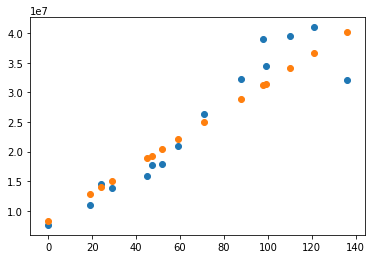

In [46]:
plt.scatter(X_test, y_test)
plt.scatter(X_test, predicts)

## train model with lastest 12 months data

In [73]:
prev_month = '2019-07'
last_year_pre_month = '2018-07'

In [74]:
mask = (sales.month <= prev_month) & (sales.month >= last_year_pre_month)

In [79]:
last_one_year_sales = sales[mask]

In [84]:
X_train_12 = last_one_year_sales.yearmonth_index.values.reshape(-1,1)
y_train_12 = last_one_year_sales.sales.values.reshape(-1,1)

In [88]:
reg_last_one_year = LinearRegression().fit(X_train_12, y_train_12)

In [89]:
reg_last_one_year.coef_

array([[61456.43406593]])

In [95]:
reg_last_one_year.predict(np.array([142]).reshape(-1,1))

array([[35181411.87912088]])

In [ ]:
prev_month = '2019-07'
last_year_pre_month = '2018-07'

In [97]:
predicts_12 = reg_last_one_year.predict(X_test)

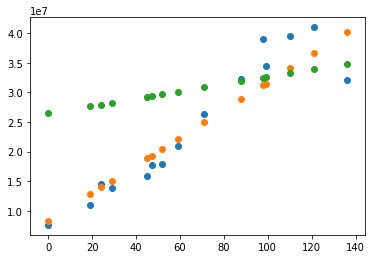

In [98]:
plt.scatter(X_test, y_test)
plt.scatter(X_test, predicts)
plt.scatter(X_test, predicts_12)

In [99]:
predicts

array([[13943427.3318994 ],
       [ 8331386.96234857],
       [22127652.87082767],
       [40132949.05646989],
       [24933673.05560309],
       [15112602.40888915],
       [12774252.25490964],
       [31481053.48674571],
       [31247218.47134776],
       [18853962.65525636],
       [20490807.76304202],
       [19321632.68605226],
       [28908868.31736825],
       [36625423.82550063],
       [34053238.65612317]])

In [103]:
predicts_12

array([[27929552.65934066],
       [26454598.24175824],
       [30080527.85164835],
       [34812673.27472527],
       [30818005.06043956],
       [28236834.82967033],
       [27622270.48901099],
       [32538785.21428572],
       [32477328.78021978],
       [29220137.77472527],
       [29650332.81318681],
       [29343050.64285714],
       [31862764.43956044],
       [33890826.76373626],
       [33214805.98901099]])

In [117]:
sales[sales['month']=='2019-08']

,month,sales
139,2019-08,34450755


In [118]:
sales[sales['month']=='2019-09']

,month,sales
140,2019-09,34044162


In [102]:
yearmonth_to_num('2019-08')

139

In [121]:
p1 = reg_last_one_year.predict(np.array([139, 140]).reshape(-1,1))

In [120]:
p2 = reg.predict(np.array([139, 140]).reshape(-1,1))

In [155]:
(p1 + p2) /2

array([[37915748.33979341],
       [38063394.06452535]])

In [157]:
def predict_all(year_month):
    year_month_index = [yearmonth_to_num(ym) for ym in year_month]
    p = reg.predict(np.array([year_month_index]).reshape(-1,1))
    return p.flatten()

In [158]:
def predict_12(year_month):
    year_month_index = [yearmonth_to_num(ym) for ym in year_month]
    p = reg_last_one_year.predict(np.array([year_month_index]).reshape(-1,1))
    return p.flatten()

In [159]:
def predict_avg(year_month):
    year_month_index = [yearmonth_to_num(ym) for ym in year_month]
    p1 = reg_last_one_year.predict(np.array([year_month_index]).reshape(-1,1))
    p2 = reg.predict(np.array([year_month_index]).reshape(-1,1))
    avg = (p1.flatten() + p2.flatten()) / 2
    return avg

In [160]:
predict_avg(['2019-09','2019-10'])

array([38063394.06452535, 38211039.7892573 ])

In [150]:
len(sales['sales'].values)

142

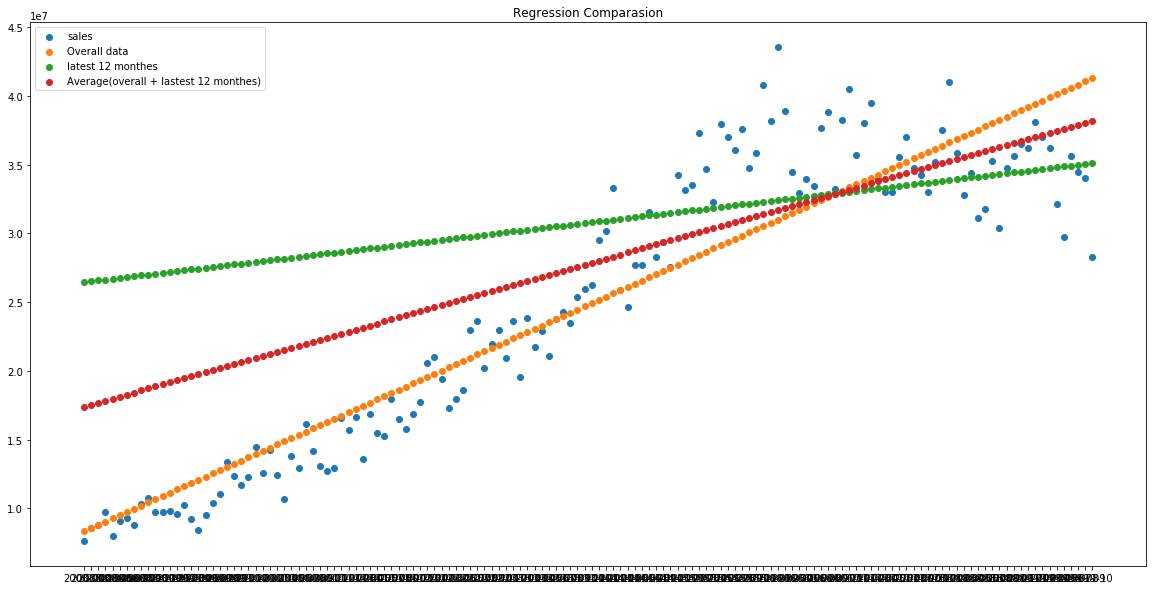

In [167]:
plt.figure(figsize=(20, 10))
plt.title("Regression Comparasion")
plt.scatter(sales['month'], sales['sales'])
plt.scatter(sales['month'], predict_all(sales['month'].values), label='Overall data')
plt.scatter(sales['month'], predict_12(sales['month'].values), label="latest 12 monthes")
plt.scatter(sales['month'], predict_avg(sales['month'].values), label="Average(overall + lastest 12 monthes)")
plt.legend()